## Time Series Project

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt 
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [4]:
date.today()

datetime.date(2025, 6, 12)

In [5]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Start and end dates:", start_date, end_date)

Start and end dates: 2024-06-12 2025-06-12


In [6]:
# define the ticker
ticker = "GOOGL"
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
# check the data
df.head()

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-06-12,176.932907,179.540287,175.261013,177.390696,27864700
2024-06-13,174.315598,175.887983,174.036949,175.261015,20913300
2024-06-14,175.937729,176.206432,173.310456,173.380126,18063600
2024-06-17,176.385574,177.500170,173.967281,174.614157,19618500
2024-06-18,174.245941,176.534857,173.260723,176.286062,21869900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-06-12 to 2025-06-11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   250 non-null    float64
 1   (High, GOOGL)    250 non-null    float64
 2   (Low, GOOGL)     250 non-null    float64
 3   (Open, GOOGL)    250 non-null    float64
 4   (Volume, GOOGL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [8]:
df.insert(0, "Date", df.index, True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Date, )         250 non-null    datetime64[ns]
 1   (Close, GOOGL)   250 non-null    float64       
 2   (High, GOOGL)    250 non-null    float64       
 3   (Low, GOOGL)     250 non-null    float64       
 4   (Open, GOOGL)    250 non-null    float64       
 5   (Volume, GOOGL)  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2024-06-12,176.932907,179.540287,175.261013,177.390696,27864700
1,2024-06-13,174.315598,175.887983,174.036949,175.261015,20913300
2,2024-06-14,175.937729,176.206432,173.310456,173.380126,18063600
3,2024-06-17,176.385574,177.500170,173.967281,174.614157,19618500
4,2024-06-18,174.245941,176.534857,173.260723,176.286062,21869900


In [11]:
df.columns = [col[0] for col in df.columns]

In [12]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2024-06-12,176.932907,179.540287,175.261013,177.390696,27864700
1,2024-06-13,174.315598,175.887983,174.036949,175.261015,20913300
2,2024-06-14,175.937729,176.206432,173.310456,173.380126,18063600
3,2024-06-17,176.385574,177.500170,173.967281,174.614157,19618500
4,2024-06-18,174.245941,176.534857,173.260723,176.286062,21869900


In [13]:
df = df[["Date", "Close"]]
df.head()

,Date,Close
0,2024-06-12,176.932907
1,2024-06-13,174.315598
2,2024-06-14,175.937729
3,2024-06-17,176.385574
4,2024-06-18,174.245941


In [14]:
fig = px.line(df, x="Date", y="Close", title="Google Stock Closing price")
fig.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
def adf_Test(df):
    result = adfuller(df)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")

adf_Test(df["Close"])

ADF Statistic: -2.0452818280495344
p-value: 0.26707807926265126
The series is not stationary


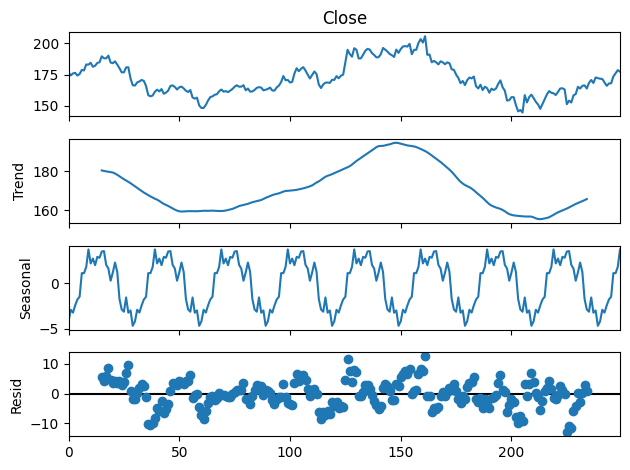

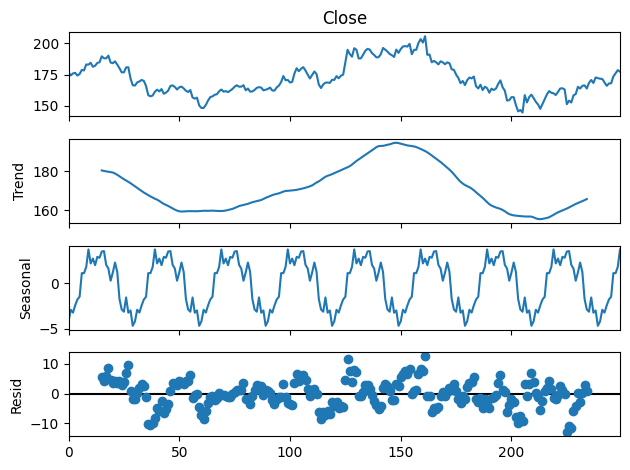

In [16]:
# decompose the data to see the trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df["Close"], model="additive", period=30)
decompose.plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df["Close"]))
print(x_acf)

           0
0   1.000000
1   0.965924
2   0.932226
3   0.896268
4   0.868745
5   0.851412
6   0.833516
7   0.812451
8   0.788258
9   0.758286
10  0.723236
11  0.693396
12  0.666582
13  0.643075
14  0.616446
15  0.591225
16  0.559722
17  0.532726
18  0.507624
19  0.479219
20  0.460029
21  0.439906
22  0.424125
23  0.406457


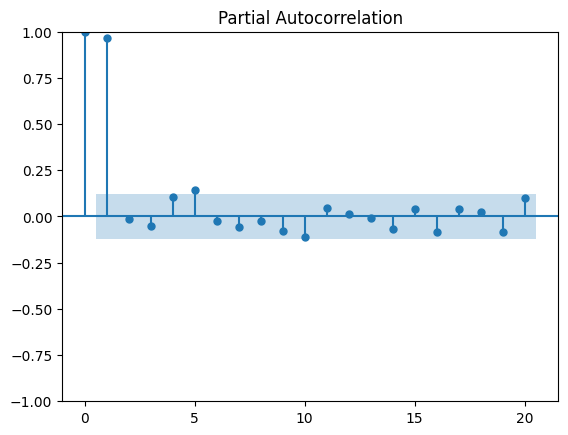

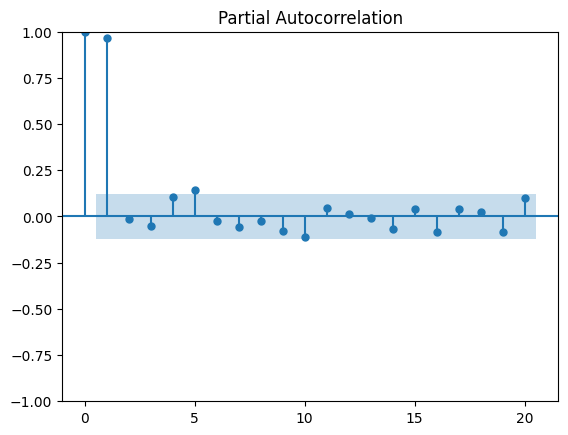

In [18]:
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df["Close"], lags=20, alpha=0.05)


In [19]:
from sktime.forecasting.arima import AutoARIMA

In [37]:
model = AutoARIMA(suppress_warnings=True, seasonal=True, start_p=1, max_p=3, start_P=1, start_q=1, max_q=3, d=1, D=1, error_action="ignore", trace=True)
model.fit(df["Close"])
print(model.summary())

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1327.175, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1323.414, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1325.411, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1325.411, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1321.414, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.519 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -659.707
Date:                Thu, 12 Jun 2025   AIC                           1321.414
Time:                        14:09:07   BIC                           1324.931
Sample:                             0   HQIC                          1322.830
                                - 250                                       

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [36]:
model = AutoARIMA(seasonal=True, suppress_warnings=True)
model.fit(df["Close"])
print(model.summary())

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be re

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -661.163
Date:                Thu, 12 Jun 2025   AIC                           1328.326
Time:                        14:08:22   BIC                           1338.891
Sample:                             0   HQIC                          1332.578
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2734      2.280      2.751      0.006       1.804      10.743
ar.L1          0.9637      0.013     73.353      0.000       0.938       0.989
sigma2        11.4826      0.734     15.645      0.0

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.645
Date:                Thu, 12 Jun 2025   AIC                           1323.290
Time:                        15:35:35   BIC                           1340.877
Sample:                             0   HQIC                          1330.369
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6031      0.144     -4.197      0.000      -0.885      -0.321
ar.L2         -0.7535      0.169     -4.446      0.000      -1.086      -0.421
ma.L1          0.5979      0.120      5.001      0.0

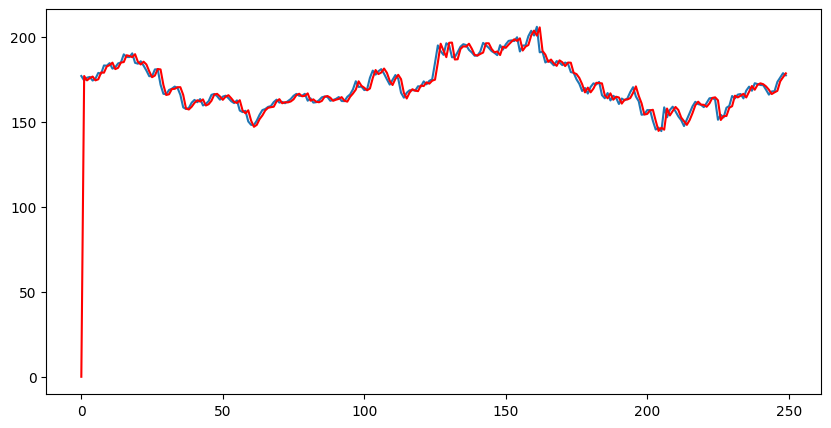

In [48]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df["Close"], order=(p,d,q))
model = model.fit()
print(model.summary())

# predict next 30 days
forecast = model.predict(n_periods=30)

# plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label = "Actual")
plt.plot(forecast, label = "Forecast", color="red")

In [49]:
import statsmodels.api as sm
import warnings

p,d,q = 2,1,2

model = sm.tsa.statespace.SARIMAX(df["Close"], order=(p,d,q), seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

c:\Users\DELL\anaconda3\envs\webscraping_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -637.670
Date:                            Thu, 12 Jun 2025   AIC                           1293.341
Time:                                    15:44:15   BIC                           1324.553
Sample:                                         0   HQIC                          1305.921
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6106      0.099     -6.189      0.000      -0.804      -0.417
ar.L2         -0.8275      0.088   

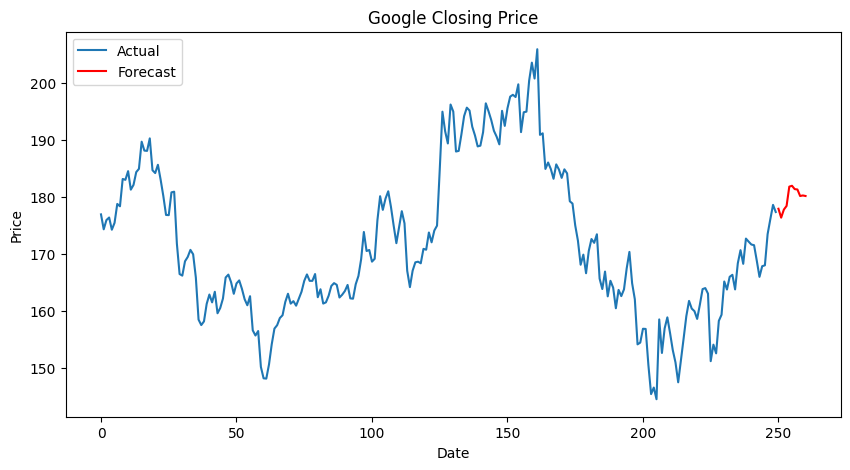

In [51]:
prediction = model.predict(start=len(df["Close"]), end=len(df["Close"])+10)
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Actual")
plt.plot(prediction, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Closing Price")

# change legend location
plt.legend(loc="upper left")
plt.show()